# Fitness Exploratory Data Analysis and Calorie Burn Prediction System

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [76]:
df = pd.read_csv("fitness_tracker_dataset.csv", low_memory=False, parse_dates=["date"])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   user_id             1000000 non-null  int64         
 1   date                1000000 non-null  datetime64[ns]
 2   steps               1000000 non-null  int64         
 3   calories_burned     1000000 non-null  float64       
 4   distance_km         1000000 non-null  float64       
 5   active_minutes      1000000 non-null  int64         
 6   sleep_hours         1000000 non-null  float64       
 7   heart_rate_avg      1000000 non-null  int64         
 8   workout_type        856880 non-null   object        
 9   weather_conditions  1000000 non-null  object        
 10  location            1000000 non-null  object        
 11  mood                1000000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 91.

In [78]:
df.isna().sum()

user_id                    0
date                       0
steps                      0
calories_burned            0
distance_km                0
active_minutes             0
sleep_hours                0
heart_rate_avg             0
workout_type          143120
weather_conditions         0
location                   0
mood                       0
dtype: int64

In [79]:
df.head()

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
0,468,2023-01-01,4530,2543.02,16.10,613,1.5,176,Walking,Clear,Park,Tired
1,879,2023-01-01,11613,1720.76,8.10,352,6.3,128,Cycling,Fog,Park,Happy
2,152,2023-01-01,27335,1706.35,3.57,236,6.7,134,Yoga,Snow,Park,Neutral
3,311,2023-01-01,13459,2912.38,6.41,1329,11.6,116,Swimming,Rain,Office,Tired
4,759,2023-01-01,15378,3344.51,17.88,52,7.4,84,Swimming,Rain,Office,Neutral


In [80]:
# Add a year column so that it can be graphed later
df["year"] = df.date.dt.year

In [81]:
df.head()

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood,year
0,468,2023-01-01,4530,2543.02,16.10,613,1.5,176,Walking,Clear,Park,Tired,2023
1,879,2023-01-01,11613,1720.76,8.10,352,6.3,128,Cycling,Fog,Park,Happy,2023
2,152,2023-01-01,27335,1706.35,3.57,236,6.7,134,Yoga,Snow,Park,Neutral,2023
3,311,2023-01-01,13459,2912.38,6.41,1329,11.6,116,Swimming,Rain,Office,Tired,2023
4,759,2023-01-01,15378,3344.51,17.88,52,7.4,84,Swimming,Rain,Office,Neutral,2023


/var/folders/r7/jw9m6vcj4j1dd60d0rkbpncm0000gn/T/ipykernel_2754/1573670730.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year', palette='viridis', ax=axes[0, 0])
/var/folders/r7/jw9m6vcj4j1dd60d0rkbpncm0000gn/T/ipykernel_2754/1573670730.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='workout_type', y='calories_burned', palette='viridis', ax=axes[1,0])
/var/folders/r7/jw9m6vcj4j1dd60d0rkbpncm0000gn/T/ipykernel_2754/1573670730.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='mood', palette

Text(0, 0.5, 'Count')

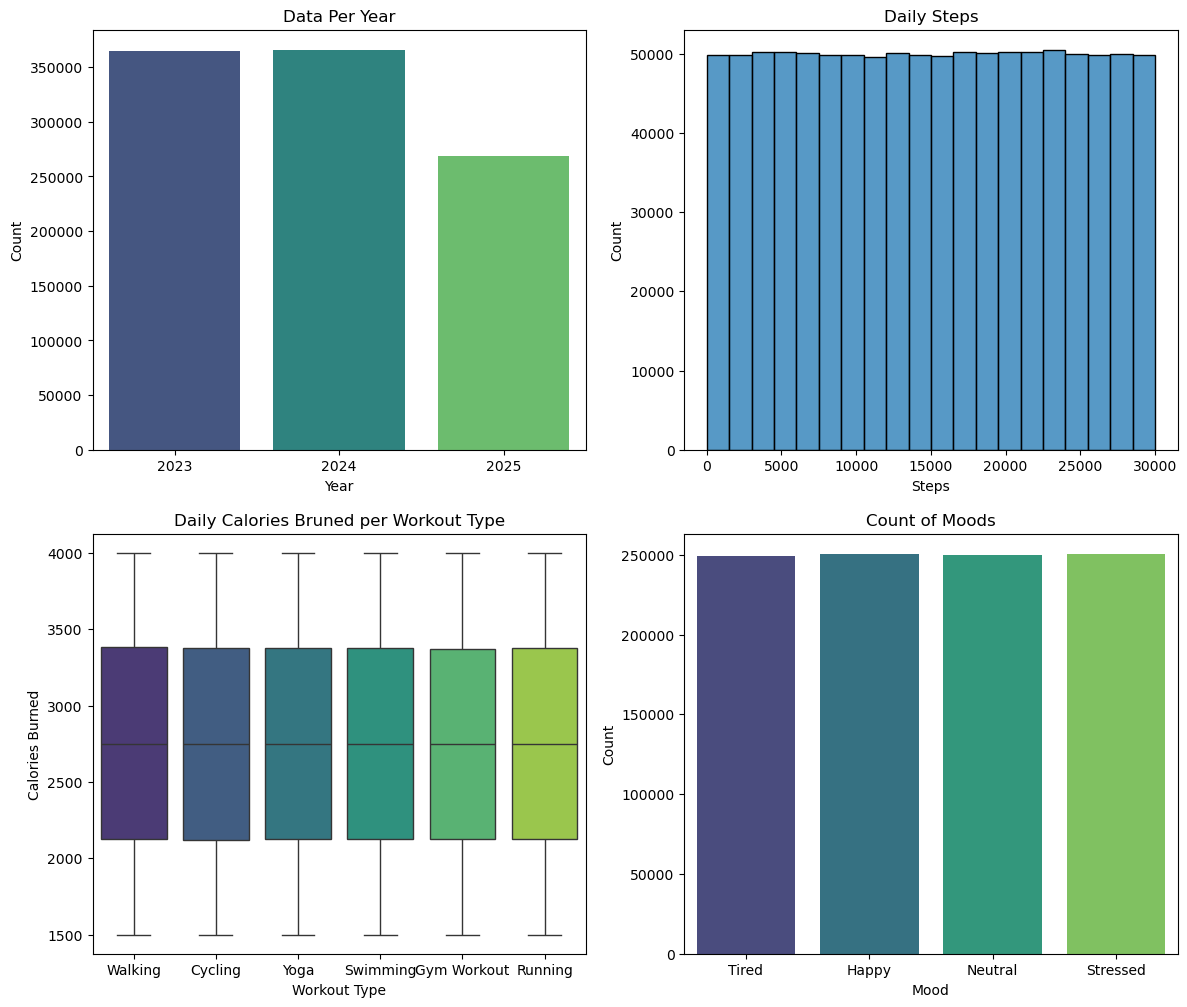

In [82]:
# Create a 2x2 subplot layout
fig, axes = plt.subplots(2,2, figsize=(14,12))

# Plot 0, 0
sns.countplot(data=df, x='year', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title("Data Per Year")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Count")

# Plot 0, 1
sns.histplot(df['steps'], bins=20, ax=axes[0,1])
axes[0, 1].set_title("Daily Steps")
axes[0, 1].set_xlabel("Steps")
axes[0, 1].set_ylabel("Count")

# Plot 1, 0
sns.boxplot(data=df, x='workout_type', y='calories_burned', palette='viridis', ax=axes[1,0])
axes[1, 0].set_title('Daily Calories Bruned per Workout Type')
axes[1, 0].set_xlabel("Workout Type")
axes[1, 0].set_ylabel("Calories Burned")

# Plot 1, 1
sns.countplot(data=df, x='mood', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title("Count of Moods")
axes[1, 1].set_xlabel("Mood")
axes[1, 1].set_ylabel("Count")

Text(0, 0.5, 'Count')

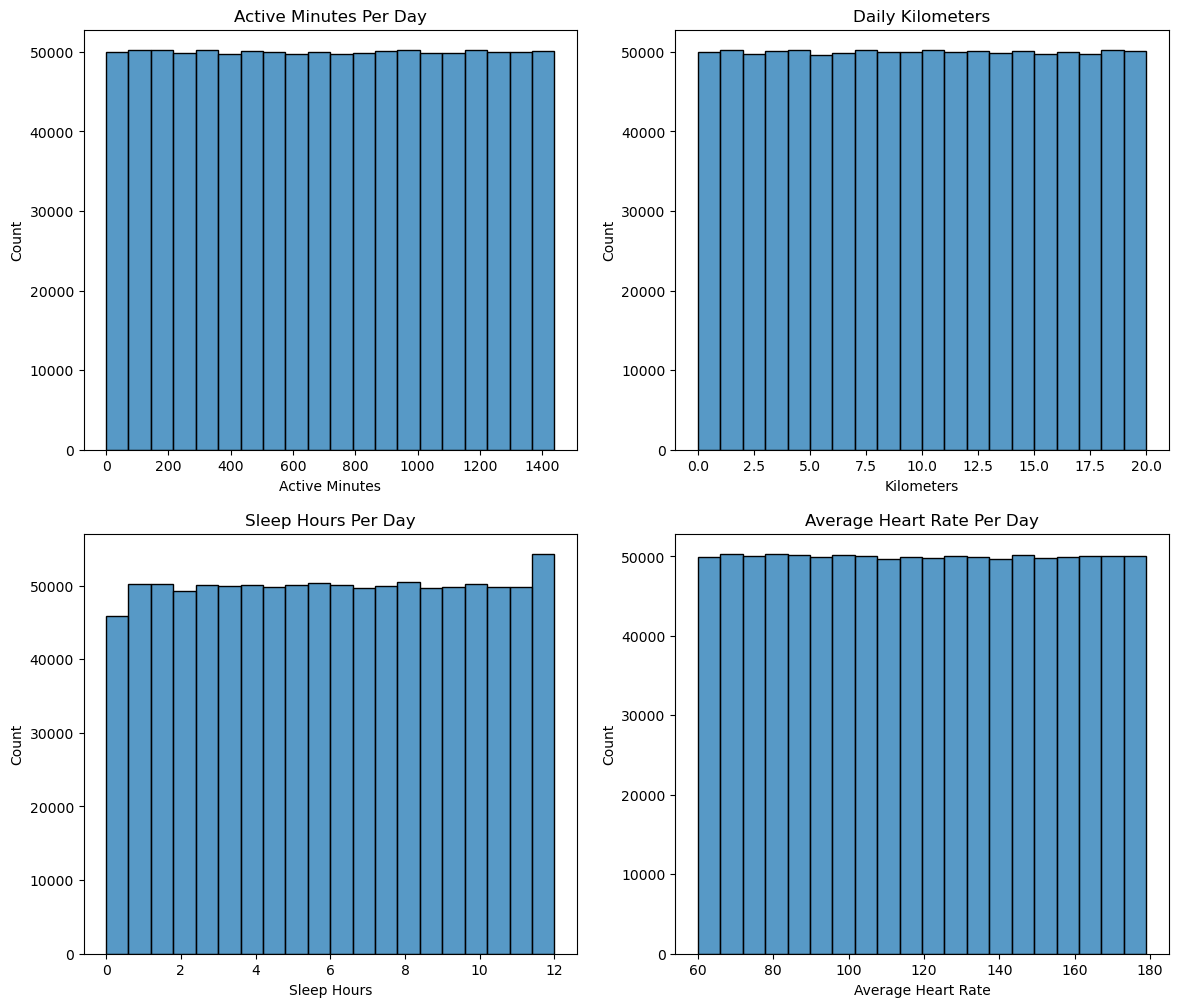

In [83]:
# Create a 2x2 subplot layout
fig, axes = plt.subplots(2,2, figsize=(14,12))

# Plot 0, 0
sns.histplot(df['active_minutes'], bins=20, ax=axes[0,0])
axes[0,0].set_title("Active Minutes Per Day")
axes[0,0].set_xlabel("Active Minutes")
axes[0,0].set_ylabel("Count")

# Plot 0, 1
sns.histplot(df['distance_km'], bins=20, ax=axes[0,1])
axes[0, 1].set_title("Daily Kilometers")
axes[0, 1].set_xlabel("Kilometers")
axes[0, 1].set_ylabel("Count")

# Plot 1, 0
sns.histplot(df['sleep_hours'], bins=20, ax=axes[1, 0])
axes[1, 0].set_title("Sleep Hours Per Day")
axes[1, 0].set_xlabel("Sleep Hours")
axes[1, 0].set_ylabel("Count")

# Plot 1, 1
sns.histplot(df['heart_rate_avg'], bins=20, ax=axes[1, 1])
axes[1, 1].set_title("Average Heart Rate Per Day")
axes[1, 1].set_xlabel("Average Heart Rate")
axes[1, 1].set_ylabel("Count")

## Fill missing values

### Fill numerical missing values first

In [84]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

user_id
steps
calories_burned
distance_km
active_minutes
sleep_hours
heart_rate_avg
year


In [85]:
# Check for which numeric columns have null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

This shows that there are no null values for numerical data

In [86]:
df.isna().sum()

user_id                    0
date                       0
steps                      0
calories_burned            0
distance_km                0
active_minutes             0
sleep_hours                0
heart_rate_avg             0
workout_type          143120
weather_conditions         0
location                   0
mood                       0
year                       0
dtype: int64

### Filling and turning categorical variables into numbers

In [87]:
# Check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

date
workout_type
weather_conditions
location
mood


In [88]:
# Turn categorical variables into numbers and fill missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes + 1

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1000000 non-null  int64  
 1   date                1000000 non-null  int16  
 2   steps               1000000 non-null  int64  
 3   calories_burned     1000000 non-null  float64
 4   distance_km         1000000 non-null  float64
 5   active_minutes      1000000 non-null  int64  
 6   sleep_hours         1000000 non-null  float64
 7   heart_rate_avg      1000000 non-null  int64  
 8   workout_type        1000000 non-null  int8   
 9   weather_conditions  1000000 non-null  int8   
 10  location            1000000 non-null  int8   
 11  mood                1000000 non-null  int8   
 12  year                1000000 non-null  int32  
dtypes: float64(3), int16(1), int32(1), int64(4), int8(4)
memory usage: 62.9 MB


In [67]:
df.head().T

,0,1,2,3,4
user_id,468.00,879.00,152.00,311.00,759.00
date,1.00,1.00,1.00,1.00,1.00
steps,4530.00,11613.00,27335.00,13459.00,15378.00
calories_burned,2543.02,1720.76,1706.35,2912.38,3344.51
distance_km,16.10,8.10,3.57,6.41,17.88
active_minutes,613.00,352.00,236.00,1329.00,52.00
sleep_hours,1.50,6.30,6.70,11.60,7.40
heart_rate_avg,176.00,128.00,134.00,116.00,84.00
workout_type,5.00,1.00,6.00,4.00,4.00
weather_conditions,1.00,2.00,4.00,3.00,3.00


In [68]:
df.isna().sum()

user_id               0
date                  0
steps                 0
calories_burned       0
distance_km           0
active_minutes        0
sleep_hours           0
heart_rate_avg        0
workout_type          0
weather_conditions    0
location              0
mood                  0
year                  0
dtype: int64

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

## Linear Regression Model